In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('McPAS-TCR.csv', encoding = 'latin1')

/Users/sowmyathanvantri/opt/anaconda3/envs/finetuning/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13,17,24,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# df2 = pd.read_csv('BindingAffinityPrediction/TCREpitopePairs.csv')

In [5]:
import pickle


with open('McPAS_Embeddings_FineTuned.pkl', 'rb') as f:
    data = pickle.load(f)

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
from sklearn.metrics.cluster import normalized_mutual_info_score

In [8]:
import numpy as np

In [9]:
df = df.loc[df['Species'] == 'Human']

In [10]:
df['Pathology.Mesh.ID']

74       D008545
75       D008545
76       D008545
77       D008545
78       D008545
          ...   
39980    D020031
39981    D020031
39982    D020031
39983    D020031
39984    D020031
Name: Pathology.Mesh.ID, Length: 36219, dtype: object

In [11]:
df['epi_id'] = df['Pathology.Mesh.ID'].astype('str')

In [12]:
df_counts = df.groupby('epi_id').count().sort_values('Pathology', ascending = False)[:8]

In [13]:
unique_epi = np.unique(df_counts.index)
nums = range(len(unique_epi))

In [14]:
epi_dict = dict(zip(unique_epi, nums))

In [15]:
top_8_df = df[df['epi_id'].isin(unique_epi)]

In [16]:
top_8_df.index

Int64Index([   74,    75,    76,    77,    78,    92,    93,    94,    95,
               96,
            ...
            39975, 39976, 39977, 39978, 39979, 39980, 39981, 39982, 39983,
            39984],
           dtype='int64', length=30591)

In [17]:
true_labels = [epi_dict[x] for x in top_8_df['epi_id']]

In [18]:
data = [data[i] for i in top_8_df.index]

In [19]:
len(data), len(top_8_df)

(30591, 30591)

In [20]:
clustering = AgglomerativeClustering(n_clusters = 14).fit(data)

In [21]:
clustering

AgglomerativeClustering(n_clusters=14)

In [22]:
labels = clustering.labels_

In [23]:
normalized_mutual_info_score(true_labels, labels)

0.03536419932793367

In [24]:
scores = {}
scores[14] = normalized_mutual_info_score(true_labels, labels)

In [25]:
scores

{14: 0.03536419932793367}

In [26]:
def find_score(num_clusters):
    clustering = AgglomerativeClustering(n_clusters = num_clusters).fit(data)
    labels = clustering.labels_
    return normalized_mutual_info_score(true_labels, labels)

In [27]:
#RUN FROM HERE

In [28]:
'hi'

'hi'

In [29]:
scores[5] = find_score(5)

In [30]:
scores

{14: 0.03536419932793367, 5: 0.03703002706927937}

In [31]:
scores[8] = find_score(8)

In [32]:
scores

{14: 0.03536419932793367, 5: 0.03703002706927937, 8: 0.03565029346611493}

In [33]:
scores[11] = find_score(11)

In [34]:
scores

{14: 0.03536419932793367,
 5: 0.03703002706927937,
 8: 0.03565029346611493,
 11: 0.03509871733192126}

In [35]:
import matplotlib.pyplot as plt

In [44]:
sorted_dict = {}
sorted_keys = list(scores.keys())
sorted_keys.sort()
for key in sorted_keys:
    sorted_dict[key] = scores[key]

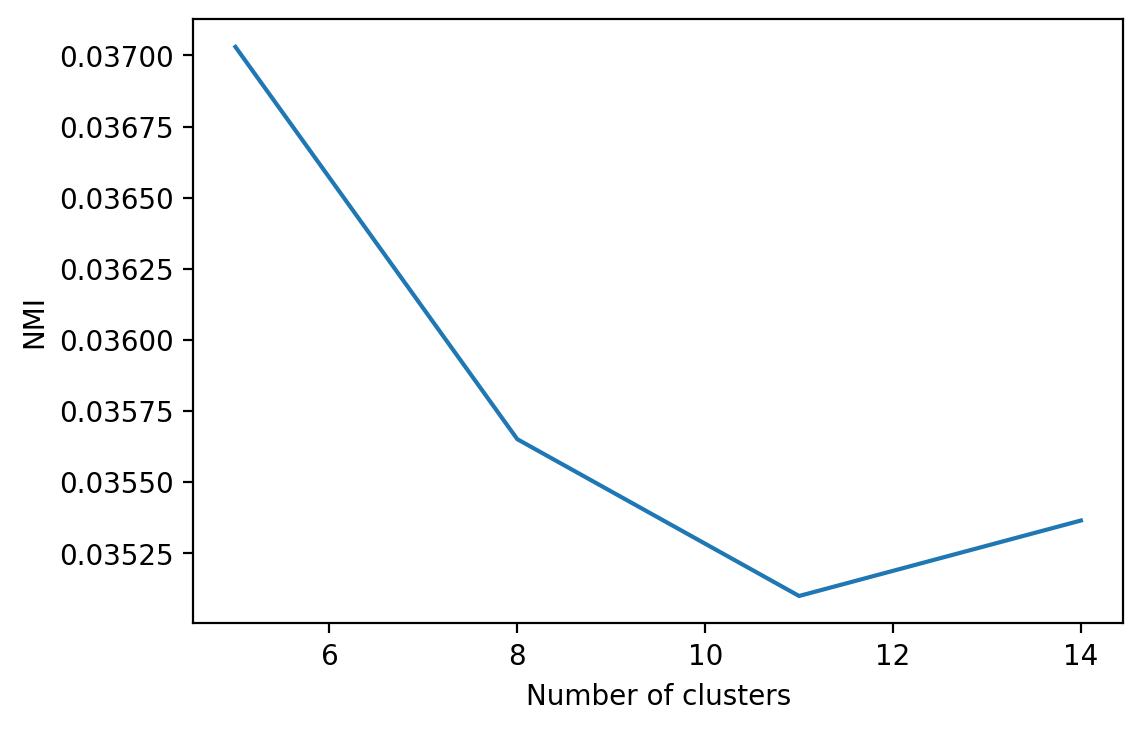

In [46]:
plt.figure(dpi = 200)
plt.plot(sorted_dict.keys(), sorted_dict.values())
plt.xlabel('Number of clusters')
plt.ylabel('NMI')
plt.show()